1. **What is hypothesis testing in statistics?**
   Hypothesis testing is a method used in statistics to make inferences or draw conclusions about a population based on sample data. It involves testing an assumption (hypothesis) about a population parameter.

2. **What is the null hypothesis, and how does it differ from the alternative hypothesis?**
   The null hypothesis (H0) is the default assumption that there is no effect or no difference. The alternative hypothesis (H1 or Ha) is what you aim to support, suggesting there is an effect or difference.

3. **What is the significance level in hypothesis testing, and why is it important?**
   The significance level (denoted by α) is the threshold for rejecting the null hypothesis. Common values are 0.05 or 0.01. It represents the probability of making a Type I error (rejecting a true null hypothesis).

4. **What does a P-value represent in hypothesis testing?**
   The P-value indicates the probability of observing the test results, or more extreme results, assuming the null hypothesis is true.

5. **How do you interpret the P-value in hypothesis testing?**
   If the P-value is less than or equal to the significance level (α), you reject the null hypothesis. A larger P-value means there is not enough evidence to reject H0.

6. **What are Type I and Type II errors in hypothesis testing?**
   - Type I Error: Rejecting a true null hypothesis (false positive).
   - Type II Error: Failing to reject a false null hypothesis (false negative).

7. **What is the difference between a one-tailed and a two-tailed test in hypothesis testing?**
   - One-tailed test checks for deviation in one direction.
   - Two-tailed test checks for deviation in both directions.

8. **What is the Z-test, and when is it used in hypothesis testing?**
   A Z-test is used when the population variance is known and the sample size is large (n > 30). It tests whether sample means differ significantly from a known population mean.

9. **How do you calculate the Z-score, and what does it represent in hypothesis testing?**
   Z = (sample mean - population mean) / (population standard deviation / sqrt(n))
   It measures how many standard deviations a sample mean is from the population mean.

10. **What is the T-distribution, and when should it be used instead of the normal distribution?**
    The T-distribution is used when the sample size is small (n < 30) and the population standard deviation is unknown.

11. **What is the difference between a Z-test and a T-test?**
    Z-test assumes known population variance and large sample size. T-test is used when variance is unknown and sample size is small.

12. **What is the T-test, and how is it used in hypothesis testing?**
    The T-test compares sample means to a known value or between two groups. It helps determine if differences are statistically significant.

13. **What is the relationship between Z-test and T-test in hypothesis testing?**
    Both test hypotheses about means. The Z-test uses normal distribution; the T-test uses the T-distribution. As sample size increases, the T-distribution approaches the normal distribution.

14. **What is a confidence interval, and how is it used to interpret statistical results?**
    A confidence interval gives a range of values within which the population parameter is expected to lie with a certain level of confidence (e.g., 95%).

15. **What is the margin of error, and how does it affect the confidence interval?**
    The margin of error is half the width of the confidence interval. A smaller margin means more precision; a larger margin means less precision.

16. **How is Bayes' Theorem used in statistics, and what is its significance?**
    Bayes' Theorem updates the probability of a hypothesis based on new evidence. It is fundamental in Bayesian statistics.

17. **What is the Chi-square distribution, and when is it used?**
    The Chi-square distribution is used for tests of independence and goodness-of-fit. It deals with categorical data.

18. **What is the Chi-square goodness of fit test, and how is it applied?**
    This test compares observed frequencies to expected frequencies to see if they follow a specified distribution.

19. **What is the F-distribution, and when is it used in hypothesis testing?**
    The F-distribution is used to compare variances and in ANOVA tests. It arises in the ratio of two variances.

20. **What is an ANOVA test, and what are its assumptions?**
    ANOVA (Analysis of Variance) compares the means of three or more groups. Assumptions include normality, homogeneity of variance, and independence.

21. **What are the different types of ANOVA tests?**
    - One-way ANOVA: tests one independent variable.
    - Two-way ANOVA: tests two independent variables.
    - Repeated measures ANOVA: for related groups over time.

22. **What is the F-test, and how does it relate to hypothesis testing?**
    The F-test compares two variances and is used in ANOVA. It helps determine if group means are significantly different.



#Practical


Z-score: -0.180, P-value: 0.857
Fail to reject the null hypothesis.


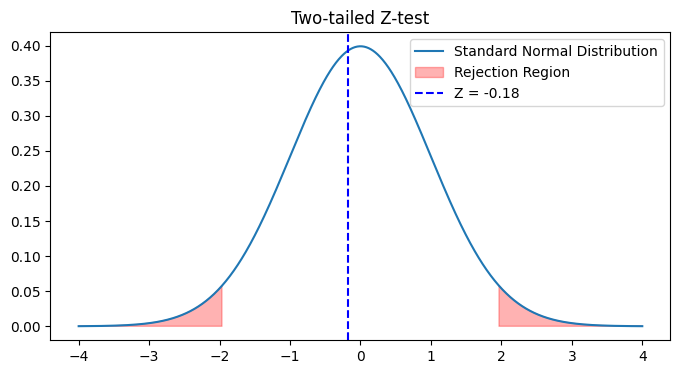

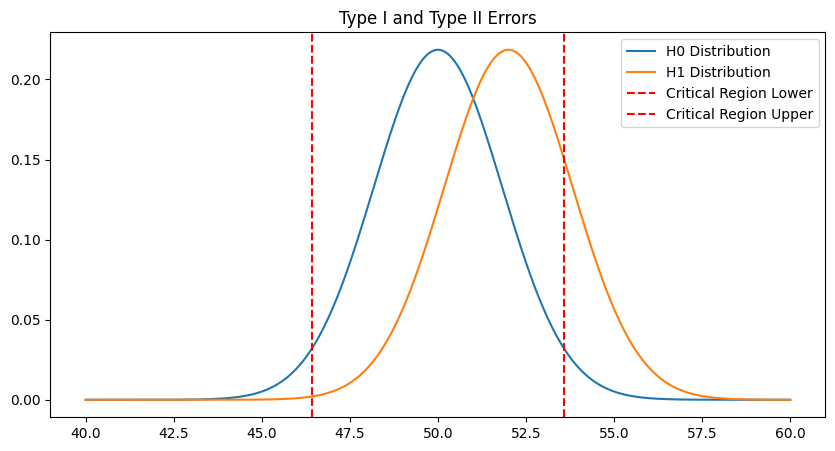

Independent T-test: t = -1.133, p = 0.262


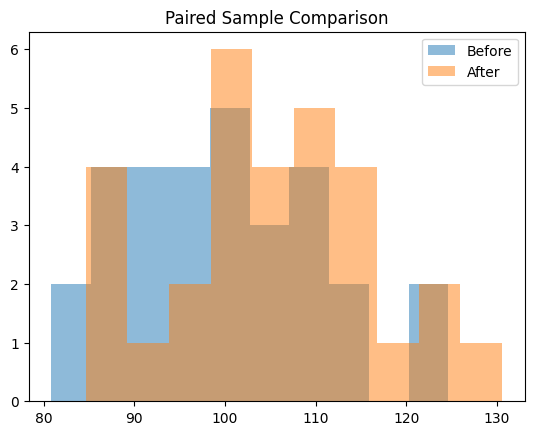

Paired T-test: t = -6.786, p = 0.000
Z-score: 0.169, P-value: 0.866
Fail to reject the null hypothesis.
T-test: t = 0.182, p = 0.857
95% Confidence Interval: 47.09 to 52.40


In [1]:
# Required libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Z-test for comparing a sample mean to a known population mean
def z_test(sample, pop_mean, pop_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    print(f"Z-score: {z:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

# 2. Simulate data and perform hypothesis testing
np.random.seed(42)
data = np.random.normal(loc=52, scale=10, size=50)
z_test(data, pop_mean=50, pop_std=10)

# 3. One-sample Z-test
# Already implemented in z_test function

# 4. Two-tailed Z-test with visualization
def visualize_z_test(sample, pop_mean, pop_std):
    z = (np.mean(sample) - pop_mean) / (pop_std / np.sqrt(len(sample)))
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label='Standard Normal Distribution')
    plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.3, label='Rejection Region')
    plt.axvline(z, color='blue', linestyle='--', label=f'Z = {z:.2f}')
    plt.title("Two-tailed Z-test")
    plt.legend()
    plt.show()

visualize_z_test(data, pop_mean=50, pop_std=10)

# 5. Type I and II errors visualization
def visualize_errors(mu0=50, mu1=52, sigma=10, n=30, alpha=0.05):
    x = np.linspace(40, 60, 1000)
    se = sigma / np.sqrt(n)
    z_crit = stats.norm.ppf(1 - alpha / 2)
    critical_value_low = mu0 - z_crit * se
    critical_value_high = mu0 + z_crit * se

    plt.figure(figsize=(10, 5))
    plt.plot(x, stats.norm.pdf(x, mu0, se), label='H0 Distribution')
    plt.plot(x, stats.norm.pdf(x, mu1, se), label='H1 Distribution')
    plt.axvline(critical_value_low, color='red', linestyle='--', label='Critical Region Lower')
    plt.axvline(critical_value_high, color='red', linestyle='--', label='Critical Region Upper')
    plt.title("Type I and Type II Errors")
    plt.legend()
    plt.show()

visualize_errors()

# 6. Independent T-test
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(105, 15, 30)
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"Independent T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 7. Paired sample T-test
before = np.random.normal(100, 10, 30)
after = before + np.random.normal(5, 5, 30)
t_stat, p_val = stats.ttest_rel(before, after)
plt.hist(before, alpha=0.5, label='Before')
plt.hist(after, alpha=0.5, label='After')
plt.title("Paired Sample Comparison")
plt.legend()
plt.show()
print(f"Paired T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 8. Compare Z-test and T-test
sample = np.random.normal(50, 12, 25)
z_test(sample, pop_mean=50, pop_std=12)
t_stat, p_val = stats.ttest_1samp(sample, 50)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 9. Confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - margin, mean + margin

ci = confidence_interval(data)
print(f"95% Confidence Interval: {ci[0]:.2f} to {ci[1]:.2f}")





Chi2: 0.000, p-value: 1.000, dof: 1
Expected Frequencies:
 [[10. 20.]
 [20. 40.]]


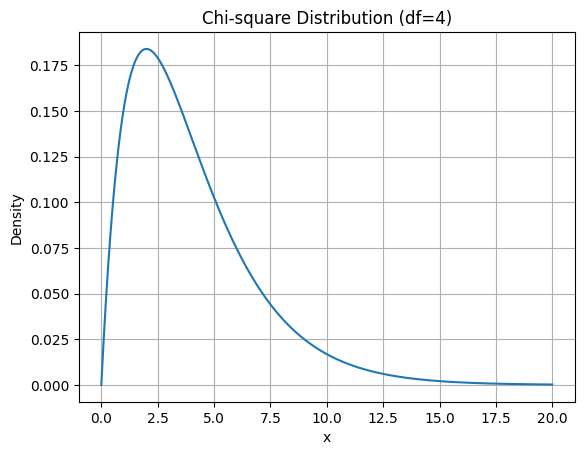

F-statistic: 0.400, p-value: 1.000
One-way ANOVA: F = 4.723, p = 0.011


<ipython-input-5-e05fba90d0fb>:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2, data3], labels=['Group1', 'Group2', 'Group3'])


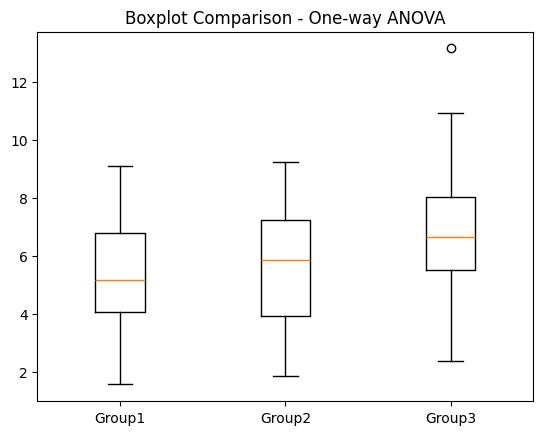

Levene Test (Equal Variance): LeveneResult(statistic=np.float64(0.11985601453240664), pvalue=np.float64(0.8871943627599705))
Shapiro Test (Normality): ShapiroResult(statistic=np.float64(0.9780109942116656), pvalue=np.float64(0.7705625614597992))
                           sum_sq    df         F    PR(>F)
C(treatment)             1.801246   1.0  0.460234  0.500308
C(group)                 0.095308   1.0  0.024352  0.876554
C(treatment):C(group)    0.247971   1.0  0.063359  0.802185
Residual               219.170479  56.0       NaN       NaN


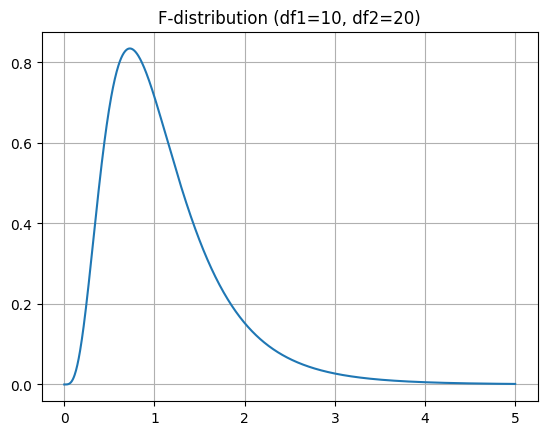

Hypothesis Test: t = 0.392, p = 0.697
Chi-square Variance Test: Chi2 = 42.172, p = 0.744
Z-test for Proportions: Z = 1.421, p = 0.155


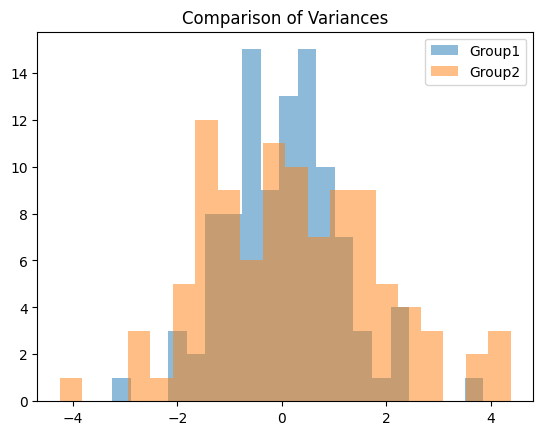

Chi-square Test (Simulated): Chi2 = 5.007, p = 0.287


In [5]:
# Required Libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# 1. Margin of Error

def margin_of_error(sample, confidence=0.95):
    n = len(sample)
    se = stats.sem(sample)
    z = stats.norm.ppf((1 + confidence) / 2)
    return z * se

# 2. Bayesian Inference

def bayesian_update(prior_A, likelihood_B_given_A, likelihood_B):
    posterior = (prior_A * likelihood_B_given_A) / likelihood_B
    return posterior

# 3. Chi-square Test for Independence

def chi_square_independence(data):
    chi2, p, dof, expected = stats.chi2_contingency(data)
    print(f"Chi2: {chi2:.3f}, p-value: {p:.3f}, dof: {dof}")
    return expected

# 4. Expected Frequencies
observed = np.array([[10, 20], [20, 40]])
expected = chi_square_independence(observed)
print("Expected Frequencies:\n", expected)



# 6. Visualize Chi-square Distribution
x = np.linspace(0, 20, 1000)
df = 4
plt.plot(x, stats.chi2.pdf(x, df))
plt.title('Chi-square Distribution (df=4)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.show()

# 7. F-test for variances
group1 = np.random.normal(0, 1, 100)
group2 = np.random.normal(0, 2, 100)
f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)
df1, df2 = len(group1)-1, len(group2)-1
p = 1 - stats.f.cdf(f_stat, df1, df2)
print(f"F-statistic: {f_stat:.3f}, p-value: {p:.3f}")

# 8. One-way ANOVA
data1 = np.random.normal(5, 2, 30)
data2 = np.random.normal(6, 2, 30)
data3 = np.random.normal(7, 2, 30)
f_stat, p = stats.f_oneway(data1, data2, data3)
print(f"One-way ANOVA: F = {f_stat:.3f}, p = {p:.3f}")

# 9. Visualize One-way ANOVA
plt.boxplot([data1, data2, data3], labels=['Group1', 'Group2', 'Group3'])
plt.title("Boxplot Comparison - One-way ANOVA")
plt.show()

# 10. Assumptions for ANOVA
from scipy.stats import levene, shapiro
print("Levene Test (Equal Variance):", levene(data1, data2, data3))
print("Shapiro Test (Normality):", shapiro(data1))

# 11. Two-way ANOVA with Visualization
df = pd.DataFrame({
    'score': np.random.normal(10, 2, 60),
    'treatment': np.repeat(['A', 'B'], 30),
    'group': ['G1'] * 15 + ['G2'] * 15 + ['G1'] * 15 + ['G2'] * 15
})
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('score ~ C(treatment) + C(group) + C(treatment):C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 12. F-distribution Visualization
x = np.linspace(0, 5, 1000)
df1, df2 = 10, 20
plt.plot(x, stats.f.pdf(x, df1, df2))
plt.title("F-distribution (df1=10, df2=20)")
plt.grid()
plt.show()

# 13. Hypothesis Test from Normal Data
normal_data = np.random.normal(100, 10, 50)
t_stat, p_val = stats.ttest_1samp(normal_data, 100)
print(f"Hypothesis Test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 14. Chi-square Test for Variance
sample_var = np.var(normal_data, ddof=1)
chi_stat = (len(normal_data) - 1) * sample_var / 100
p_val = 1 - stats.chi2.cdf(chi_stat, df=len(normal_data)-1)
print(f"Chi-square Variance Test: Chi2 = {chi_stat:.3f}, p = {p_val:.3f}")

# 15. Z-test for Proportions
n1, p1 = 100, 0.60
n2, p2 = 100, 0.50
p_hat = (p1 * n1 + p2 * n2) / (n1 + n2)
se = np.sqrt(p_hat * (1 - p_hat) * (1/n1 + 1/n2))
z = (p1 - p2) / se
p = 2 * (1 - stats.norm.cdf(abs(z)))
print(f"Z-test for Proportions: Z = {z:.3f}, p = {p:.3f}")

# 16. Visualize F-test for Variances
plt.hist(group1, bins=20, alpha=0.5, label="Group1")
plt.hist(group2, bins=20, alpha=0.5, label="Group2")
plt.legend()
plt.title("Comparison of Variances")
plt.show()

# 17. Chi-square Goodness-of-fit with Simulated Data
observed = np.random.randint(15, 35, 5)
expected = np.full(5, observed.sum() / 5)
chi2, p = stats.chisquare(observed, expected)
print(f"Chi-square Test (Simulated): Chi2 = {chi2:.3f}, p = {p:.3f}")
